In [135]:
import pandas as pd 
import numpy as np
import matplotlib

# Importation et Concaténation 

In [136]:
dfS = pd.read_csv('Projet_du_doc_sample_Sylvere.csv', delimiter=',', header=None)
dfF = pd.read_csv('sample_Francois.csv', delimiter=',', header=None, encoding='latin_1')
# probleme d'accents
dfV = pd.read_csv('sample_Vitali.csv', delimiter=';', header=None, error_bad_lines=False)
dfW = pd.read_csv('sample_Wesley_labeled.csv', delimiter=';', header=None, skiprows=1)
dfC = pd.read_csv('sample_Cedric_labeled.csv', delimiter=';', header=None, skiprows=1, encoding='latin-1')
# probleme d'accents
dfFa = pd.read_csv('sample_Fatima.xlsx - sample_Fatima.csv', delimiter=',', header=None)

In [137]:
dfV.drop(columns=[3], inplace=True) #supprime les colonnes

#dfC.drop(columns=[1, 2], inplace=True)


In [138]:
dfC1 = dfC[[1, 0, 2]] # reordonne les colonnes

dfC1.columns = [0, 1, 2] #renomme les indexes colonnes

In [139]:
dfW1 = dfW[[0, 2, 1]]  # reordonne les colonnes

dfW1.columns = [0, 1, 2] #renomme les indexes colonnes


In [140]:
dfFa1 = dfFa[[1, 0, 2]]

dfFa1.columns = [0, 1, 2]

In [141]:
dfF1 = dfF[[1, 0, 2]]

dfF1.columns = [0, 1, 2]

In [142]:
#Concatene tous nos csv dans un seul dataframe

df_1 = pd.concat([dfS, dfF1, dfC1, dfV, dfFa1, dfW1], ignore_index=True, axis=0)


In [143]:
print(df_1.dtypes)

0    object
1    object
2    object
dtype: object


In [144]:
type(df_1.index)

pandas.core.indexes.range.RangeIndex

In [145]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 3 columns):
0    527 non-null object
1    576 non-null object
2    501 non-null object
dtypes: object(3)
memory usage: 14.1+ KB
None


In [146]:
df_1

,0,1,2
0,54,Acceuil / Politesse,Cet espace a perdu de son intérêt. On y trouva...
1,685,Relation commercial,Impossible d'avoir un conseiller par téléphone...
2,1665,Acceuil / Politesse,Accueil excellent temps d'attente cours
3,1437,Acceuil / Politesse,Très bon accueil
4,1587,Acceuil / Politesse,Parsonnel aimable et efficace
5,1279,Acceuil / Politesse,"Didier a l'accueil est très désagréable, il n'..."
6,1689,Acceuil / Politesse,Le personnel n'est vraiment pas orienté client...
7,830,Acceuil / Politesse,Personnel plus préoccupé par le papotage entre...
8,2385,Emotion,"Très déçue de Orange,chez qui pourtant je suis..."
9,814,Temps d'attente,"Juste minable, une fois qu'on vous a enregistr..."


In [147]:
#import nltk 

#nltk.download()

# Tokenisation et Stopwords 

In [148]:
import nltk
from nltk.corpus import stopwords
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [149]:
from string import punctuation
import re

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk import word_tokenize, pos_tag

## Tokenisation

In [150]:
# tous les carateres en miniscule et le contenu des colonnes en string 

df_2 = pd.concat([df_1[col].astype(str).str.lower() for col in df_1.columns], axis=1)

In [151]:
df_2

,0,1,2
0,54,acceuil / politesse,cet espace a perdu de son intérêt. on y trouva...
1,685,relation commercial,impossible d'avoir un conseiller par téléphone...
2,1665,acceuil / politesse,accueil excellent temps d'attente cours
3,1437,acceuil / politesse,très bon accueil
4,1587,acceuil / politesse,parsonnel aimable et efficace
5,1279,acceuil / politesse,"didier a l'accueil est très désagréable, il n'..."
6,1689,acceuil / politesse,le personnel n'est vraiment pas orienté client...
7,830,acceuil / politesse,personnel plus préoccupé par le papotage entre...
8,2385,emotion,"très déçue de orange,chez qui pourtant je suis..."
9,814,temps d'attente,"juste minable, une fois qu'on vous a enregistr..."


In [152]:
# les commentaires [col,2] sont mis dans df_comment

df_comment = df_2[2]

In [153]:
type(df_comment)

pandas.core.series.Series

In [154]:
#place les commentaires dans une varb en str
commentstr = ''.join(df_comment)

In [155]:
print(type(commentstr))


<class 'str'>


In [156]:
#les commentaires stocker dans un string pour pouvoir les passer dans le tokenizer
commentstr

'cet espace a perdu de son intérêt. on y trouvait un service compétent et agréable maintenant il ne reste plus que le compétent.  pour combien de temps encore ... avec les économies d\'orange ?impossible d\'avoir un conseiller par téléphone (un comble!!!), leur numéro est introuvable où que ce soit!?! je mettrais 0 étoile si c\'était possible!accueil excellent temps d\'attente courstrès bon accueilparsonnel aimable et efficacedidier a l\'accueil est très désagréable, il n\'a pas du tout envie d\'être là et il est agacé par chaque client. le reste de l\'équipe est très dynamique dommage le premier accueil est le plus important.le personnel n\'est vraiment pas orienté client ! franchement je déconseille cette boutique !!!personnel plus préoccupé par le papotage entre amie que par le client.  orange veut faire la banque ....il devrait commencer par choisir son personnel. après 15 minutes d\'attente  , la personne n a pas vu qu\'elle avait un client..mais sa copine part en vacance demain..

In [157]:
#commentstr3 = tknzr.tokenize(commentstr)

In [158]:
# On met la methode RegexTokennizer dans la varb tokenizer
tokenizer = nltk.RegexpTokenizer(r'\w+')


In [159]:
# On transforme commentstr en token
commentstr4 = tokenizer.tokenize(commentstr)

In [160]:
print(len(commentstr4))

15672


In [161]:
type(commentstr4)

list

### Visulisation des données

In [162]:
# Stocke dans freq la frequence d'apparition des mots dans nos tokens

freq = nltk.FreqDist(commentstr4)

In [163]:
freq

FreqDist({'de': 468, 'et': 371, 'la': 240, 'le': 236, 'un': 226, 'je': 212, 'à': 204, 'que': 203, 'd': 199, 'pas': 198, ...})

In [259]:
len(freq)

3200

In [164]:
#places les mots(tokens) les plus  frequents dans 'freq_mostcom' un dict{}
freq_mostcom = freq.most_common(25)

In [165]:
freq_mostcom

[('de', 468),
 ('et', 371),
 ('la', 240),
 ('le', 236),
 ('un', 226),
 ('je', 212),
 ('à', 204),
 ('que', 203),
 ('d', 199),
 ('pas', 198),
 ('a', 177),
 ('pour', 175),
 ('l', 175),
 ('est', 173),
 ('en', 163),
 ('les', 139),
 ('une', 139),
 ('vous', 131),
 ('boutique', 121),
 ('ne', 120),
 ('orange', 118),
 ('très', 114),
 ('ã', 112),
 ('me', 110),
 ('service', 108)]

In [166]:
#place les comment les plus frequents dans un dataframe pour faire un graph

df_freq = pd.DataFrame.from_dict(freq_mostcom)

In [167]:
df_freq.columns = ['mots', 'total']

df_freq

,mots,total
0,de,468
1,et,371
2,la,240
3,le,236
4,un,226
5,je,212
6,à,204
7,que,203
8,d,199
9,pas,198


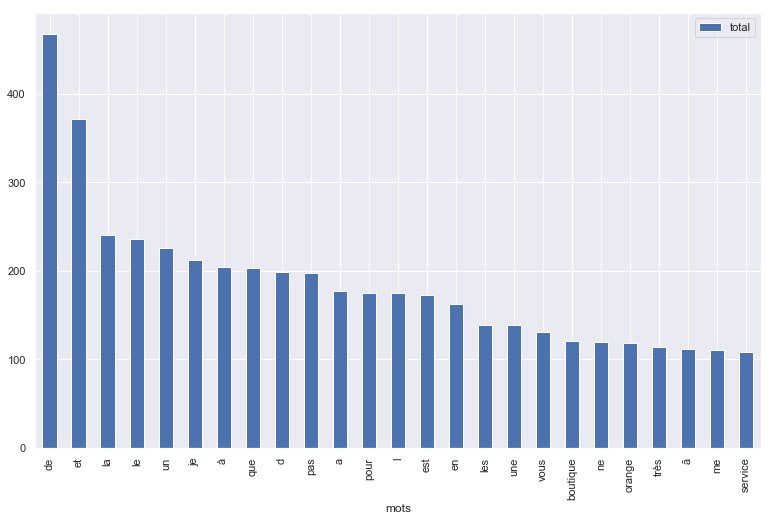

In [168]:
df_freq.plot.bar(x='mots',y='total')


[Text(0, 0, 'de'),
 Text(0, 0, 'et'),
 Text(0, 0, 'la'),
 Text(0, 0, 'le'),
 Text(0, 0, 'un'),
 Text(0, 0, 'je'),
 Text(0, 0, 'à'),
 Text(0, 0, 'que'),
 Text(0, 0, 'd'),
 Text(0, 0, 'pas'),
 Text(0, 0, 'a'),
 Text(0, 0, 'pour'),
 Text(0, 0, 'l'),
 Text(0, 0, 'est'),
 Text(0, 0, 'en'),
 Text(0, 0, 'les'),
 Text(0, 0, 'une'),
 Text(0, 0, 'vous'),
 Text(0, 0, 'boutique'),
 Text(0, 0, 'ne'),
 Text(0, 0, 'orange'),
 Text(0, 0, 'très'),
 Text(0, 0, 'ã'),
 Text(0, 0, 'me'),
 Text(0, 0, 'service')]

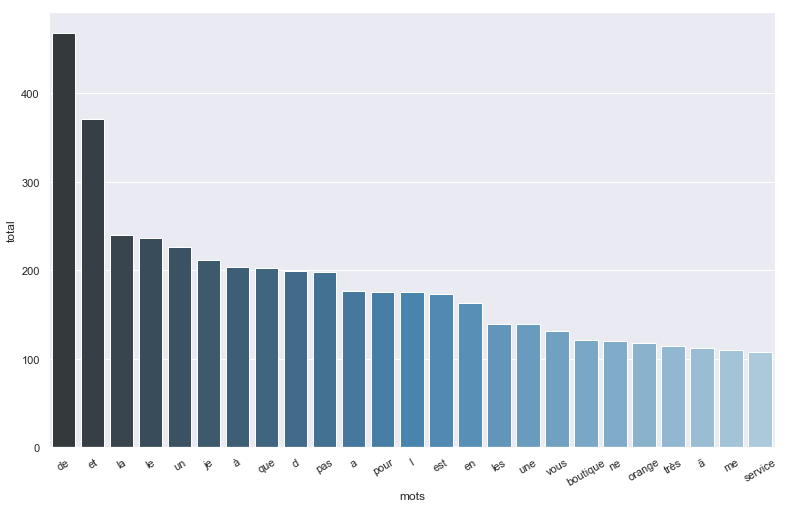

In [169]:
import seaborn as sns


sns.set(rc={'figure.figsize':(13,8)})

graph = sns.barplot(x="mots", y="total", data=df_freq, palette="Blues_d", orient="v" )
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)

## Analyse des données et stopwords

In [170]:
no_stopwords = set(('ne', 'pas','n'))

punctuation = set(punctuation) - set(('?', '!'))


In [171]:
stoplist = set(nltk.corpus.stopwords.words('french')) - no_stopwords

len(stoplist)

154

### Suppression des mots les plus fréquents

In [172]:
#les 18 mots les plus frequents
freq_mostcom18 = freq.most_common(18)

In [173]:
#rajoute les 18 mots les plus frequents a la stoplist
stoplist.update(freq_mostcom18)

len(stoplist)

172

In [215]:
comment5 = []

In [216]:
#Stock dans comment5, tous les mots non présent dans la stoplist et punctuation
comment5 += [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

In [217]:
comment5

['cet',
 'espace',
 'perdu',
 'intérêt',
 'trouvait',
 'service',
 'compétent',
 'agréable',
 'maintenant',
 'ne',
 'reste',
 'plus',
 'compétent',
 'combien',
 'temps',
 'encore',
 'économies',
 'orange',
 'impossible',
 'avoir',
 'conseiller',
 'téléphone',
 'comble',
 'numéro',
 'introuvable',
 'où',
 'mettrais',
 'étoile',
 'si',
 'possible',
 'accueil',
 'excellent',
 'temps',
 'attente',
 'courstrès',
 'bon',
 'accueilparsonnel',
 'aimable',
 'efficacedidier',
 'accueil',
 'très',
 'désagréable',
 'n',
 'pas',
 'tout',
 'envie',
 'être',
 'là',
 'agacé',
 'chaque',
 'client',
 'reste',
 'équipe',
 'très',
 'dynamique',
 'dommage',
 'premier',
 'accueil',
 'plus',
 'important',
 'personnel',
 'n',
 'vraiment',
 'pas',
 'orienté',
 'client',
 'franchement',
 'déconseille',
 'cette',
 'boutique',
 'personnel',
 'plus',
 'préoccupé',
 'papotage',
 'entre',
 'amie',
 'client',
 'orange',
 'veut',
 'faire',
 'banque',
 'devrait',
 'commencer',
 'choisir',
 'personnel',
 'après',
 'minu

In [219]:
len(comment5)

9324

### Mots les moins fréquents

In [179]:
#Les moins frequents

freq_less = dict(freq.most_common()[-100:])

In [185]:
freq_less

{'foreign': 1,
 'here': 1,
 'rip': 1,
 'off': 1,
 'did': 1,
 'take': 1,
 'care': 1,
 'foutiste': 1,
 'quelqu': 1,
 'liste': 1,
 '48h': 1,
 'famille': 1,
 'connait': 1,
 'reprocher': 1,
 'toutefois': 1,
 'pleine': 1,
 'rationaliser': 1,
 'consenti': 1,
 'concentrant': 1,
 'essentiel': 1,
 'plutot': 1,
 'tapper': 1,
 'discute': 1,
 'essayer': 1,
 'annexes': 1,
 'exprimé': 1,
 'désinteret': 1,
 'disponiblebeau': 1,
 'petits': 1,
 'soins': 1,
 'àtrès': 1,
 'accueillante30': 1,
 'rappeler': 1,
 'raccrocher': 1,
 'nez': 1,
 'côtoient': 1,
 'fermés': 1,
 '14h': 1,
 'stocks': 1,
 'nettement': 1,
 'chères': 1,
 'web': 1,
 'conditions': 1,
 'possibilité': 1,
 'attendrevous': 1,
 'attendez': 1,
 '20mn': 1,
 'rappelle': 1,
 'vérifie': 1,
 'renvoient': 1,
 'moralité': 1,
 'deuxième': 1,
 'générale': 1,
 'coach': 1,
 'chef3': 1,
 'vigiles': 1,
 'probablement': 1,
 'réel': 1,
 'simulation': 1,
 'réglé': 1,
 'people': 1,
 'travel': 1,
 'sorted': 1,
 'thank': 1,
 'comptoir': 1,
 'papotaient': 1,
 'lang

### Mots par nombres d'apparitions

In [180]:
#Place les valeurs du dict avec les frequences d'apparition des mots dans nb1()
nb1 = freq.values()

nb1

dict_values([8, 3, 177, 3, 468, 14, 1, 96, 52, 1, 226, 108, 13, 371, 17, 7, 106, 120, 6, 86, 203, 236, 175, 5, 31, 13, 67, 139, 1, 199, 118, 7, 26, 16, 94, 31, 1, 18, 4, 173, 2, 7, 63, 13, 212, 1, 5, 6, 40, 72, 38, 7, 94, 19, 81, 1, 46, 1, 21, 1, 175, 114, 12, 98, 198, 98, 43, 6, 23, 12, 1, 5, 64, 9, 5, 11, 3, 1, 76, 15, 2, 4, 3, 60, 121, 1, 1, 10, 1, 5, 33, 240, 2, 5, 1, 1, 18, 4, 18, 34, 9, 64, 24, 16, 73, 8, 1, 4, 163, 1, 2, 2, 27, 1, 10, 37, 1, 3, 102, 11, 52, 6, 102, 79, 28, 1, 76, 7, 1, 204, 90, 1, 1, 1, 77, 3, 1, 2, 1, 1, 1, 1, 3, 15, 17, 1, 2, 15, 2, 2, 1, 1, 15, 2, 110, 28, 8, 1, 2, 11, 4, 131, 9, 2, 2, 139, 29, 4, 5, 37, 5, 1, 20, 7, 10, 6, 6, 2, 1, 2, 2, 1, 19, 9, 3, 7, 7, 2, 7, 15, 5, 9, 9, 2, 41, 1, 3, 69, 32, 1, 1, 1, 8, 17, 3, 1, 6, 1, 15, 2, 2, 2, 3, 1, 1, 9, 3, 5, 15, 1, 1, 5, 37, 9, 41, 3, 5, 2, 3, 64, 4, 1, 7, 6, 17, 5, 1, 6, 35, 1, 74, 4, 60, 1, 1, 1, 1, 74, 1, 1, 1, 2, 1, 29, 16, 4, 31, 4, 2, 2, 5, 5, 2, 1, 8, 67, 4, 2, 8, 1, 3, 7, 11, 25, 1, 1, 12, 49, 6, 13, 2, 5

In [181]:
from collections import Counter


In [186]:
#Counter va compter la frequence d'apparition des mots par nombre(nb1 = valeurs du dict Freq) 
nb_apparition_mots = Counter(nb1)


In [194]:
#frequence d'apparition des mots par nombre, classer du plus petit au plus grand
#ex: il y a 1945 mots qui apparaissent 1 fois 

nb_apparition_mots.most_common()
    

[(1, 1945),
 (2, 468),
 (3, 205),
 (4, 109),
 (5, 89),
 (6, 58),
 (7, 47),
 (8, 35),
 (9, 27),
 (10, 19),
 (16, 14),
 (11, 14),
 (15, 12),
 (12, 11),
 (14, 9),
 (13, 9),
 (17, 9),
 (18, 6),
 (31, 5),
 (25, 5),
 (19, 4),
 (21, 4),
 (33, 4),
 (40, 3),
 (64, 3),
 (24, 3),
 (37, 3),
 (28, 3),
 (32, 3),
 (52, 2),
 (175, 2),
 (67, 2),
 (139, 2),
 (26, 2),
 (94, 2),
 (38, 2),
 (98, 2),
 (23, 2),
 (76, 2),
 (60, 2),
 (27, 2),
 (102, 2),
 (29, 2),
 (20, 2),
 (41, 2),
 (35, 2),
 (74, 2),
 (22, 2),
 (177, 1),
 (468, 1),
 (96, 1),
 (226, 1),
 (108, 1),
 (371, 1),
 (106, 1),
 (120, 1),
 (86, 1),
 (203, 1),
 (236, 1),
 (199, 1),
 (118, 1),
 (173, 1),
 (63, 1),
 (212, 1),
 (72, 1),
 (81, 1),
 (46, 1),
 (114, 1),
 (198, 1),
 (43, 1),
 (121, 1),
 (240, 1),
 (34, 1),
 (73, 1),
 (163, 1),
 (79, 1),
 (204, 1),
 (90, 1),
 (77, 1),
 (110, 1),
 (131, 1),
 (69, 1),
 (49, 1),
 (112, 1)]

### Mots par ordre alphabétique

In [191]:
#Les mots du dataset ranger par ordre alphabetiques
mots_alphabetique = sorted(freq)

In [193]:
type(mots_alphabetique)

list

In [206]:
mots_alphabetique

['0',
 '00',
 '04',
 '06',
 '1',
 '10',
 '100',
 '1000',
 '10gb',
 '10min',
 '110euros',
 '11h',
 '11h30',
 '12',
 '120',
 '12h31',
 '12h45',
 '14h',
 '14h00',
 '15',
 '15min',
 '15minutes',
 '15mn',
 '15â',
 '16',
 '17',
 '18',
 '18h',
 '19',
 '19h',
 '19h20',
 '19h30',
 '19h34',
 '1an',
 '1h',
 '1h30',
 '1ère',
 '2',
 '20',
 '200',
 '2005',
 '2016',
 '2017',
 '2018',
 '2019',
 '20gb',
 '20h00',
 '20mn',
 '20â',
 '20분',
 '20유로는',
 '21eme',
 '22',
 '25',
 '26h',
 '2gb',
 '2h',
 '2h45',
 '2nouveaux',
 '2ème',
 '3',
 '30',
 '30degres',
 '30mn',
 '35',
 '35min',
 '3900',
 '390ppersonnel',
 '3j',
 '3ã',
 '4',
 '40',
 '40유로',
 '45',
 '48h',
 '4g',
 '5',
 '50',
 '50ã',
 '5km',
 '5mn',
 '6',
 '600',
 '64go',
 '7',
 '76',
 '82',
 '9',
 '900ms',
 '92très',
 '99',
 'a',
 'a5',
 'abandoner',
 'able',
 'ables',
 'abonnement',
 'abonnements',
 'abonnementvaut',
 'abonnent',
 'abonner',
 'abord',
 'about',
 'aboutir',
 'absence',
 'absente',
 'absolument',
 'abstenir',
 'abusent',
 'accepté',
 'acce

#### Suppression de nombres

In [240]:
#les 93 premiers(a supprimer), qui sont des nombres ou des heures
nb_a_supp = mots_alphabetique[:93]

In [241]:
#rajoute les nb a la stoplist
stoplist.update(nb_a_supp)

len(stoplist)

265

In [243]:
stoplist

{('a', 177),
 ('d', 199),
 ('de', 468),
 ('en', 163),
 ('est', 173),
 ('et', 371),
 ('je', 212),
 ('l', 175),
 ('la', 240),
 ('le', 236),
 ('les', 139),
 ('pas', 198),
 ('pour', 175),
 ('que', 203),
 ('un', 226),
 ('une', 139),
 ('vous', 131),
 ('à', 204),
 '0',
 '00',
 '04',
 '06',
 '1',
 '10',
 '100',
 '1000',
 '10gb',
 '10min',
 '110euros',
 '11h',
 '11h30',
 '12',
 '120',
 '12h31',
 '12h45',
 '14h',
 '14h00',
 '15',
 '15min',
 '15minutes',
 '15mn',
 '15â',
 '16',
 '17',
 '18',
 '18h',
 '19',
 '19h',
 '19h20',
 '19h30',
 '19h34',
 '1an',
 '1h',
 '1h30',
 '1ère',
 '2',
 '20',
 '200',
 '2005',
 '2016',
 '2017',
 '2018',
 '2019',
 '20gb',
 '20h00',
 '20mn',
 '20â',
 '20분',
 '20유로는',
 '21eme',
 '22',
 '25',
 '26h',
 '2gb',
 '2h',
 '2h45',
 '2nouveaux',
 '2ème',
 '3',
 '30',
 '30degres',
 '30mn',
 '35',
 '35min',
 '3900',
 '390ppersonnel',
 '3j',
 '3ã',
 '4',
 '40',
 '40유로',
 '45',
 '48h',
 '4g',
 '5',
 '50',
 '50ã',
 '5km',
 '5mn',
 '6',
 '600',
 '64go',
 '7',
 '76',
 '82',
 '9',
 '900m

In [249]:
comment7 = []

In [305]:
comment7 = [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

len(comment7)

8131

In [255]:
len(freq)

3200

In [258]:
len(commentstr4)

15672

#### suppression de mots récurrents

In [262]:
freq2 = nltk.FreqDist(comment7)



FreqDist({'pas': 198, 'boutique': 121, 'ne': 120, 'orange': 118, 'très': 114, 'ã': 112, 'service': 108, 'n': 98, 'accueil': 94, 'plus': 86, ...})

In [266]:
len(freq2)

3011

In [270]:
freq2.most_common() 

[('pas', 198),
 ('boutique', 121),
 ('ne', 120),
 ('orange', 118),
 ('très', 114),
 ('ã', 112),
 ('service', 108),
 ('n', 98),
 ('accueil', 94),
 ('plus', 86),
 ('attente', 81),
 ('personnel', 76),
 ('bien', 74),
 ('client', 64),
 ('cette', 60),
 ('vendeur', 49),
 ('bon', 46),
 ('tout', 43),
 ('clients', 41),
 ('si', 40),
 ('vendeurs', 40),
 ('peu', 38),
 ('chez', 37),
 ('car', 37),
 ('fait', 37),
 ('sim', 35),
 ('personne', 34),
 ('faire', 33),
 ('original', 33),
 ('sans', 32),
 ('dã', 32),
 ('temps', 31),
 ('téléphone', 31),
 ('magasin', 31),
 ('traduit', 31),
 ('google', 31),
 ('fois', 29),
 ('rien', 29),
 ('dit', 28),
 ('trop', 28),
 ('trã', 27),
 ('avoir', 26),
 ('comme', 25),
 ('carte', 25),
 ('agence', 25),
 ('tã', 25),
 ('rã', 25),
 ('and', 24),
 ('être', 23),
 ('quand', 23),
 ('internet', 22),
 ('beaucoup', 22),
 ('aimable', 21),
 ('to', 21),
 ('écoute', 21),
 ('i', 21),
 ('donc', 20),
 ('autre', 20),
 ('excellent', 19),
 ('mobile', 19),
 ('problème', 19),
 ('après', 18),
 ('m

In [328]:
mots_a_sup = ("tant pouvais pouvoir faire bonjour comme etc lorsque dit cet veut veux rue alpagué dû première côté quel certain doit opã oui mn haut pris faut u deux cette tout si car ã my problã of allez leurs puis entre bonour voir aussi quoi cela autres e the lã in for alors prendre ça dire aller après donc i to être and rã tã trã fois traduit dã fait chez cette ã mère tabac poste mis go  are went some sold  us when up do french venez agrã quâ ds annã occupã allã mãªme là nâ number your apple who weeks about quickly quant effet passée min rj11 esim demain pompom durant viendrais sent habite trois hors ainsi all dés train vont chère via troisième just think their better first could but new now our what selling even allée mains imprimante justificatif rendue vie midi r coise film ue faisant mise bã mã numã ãªtes sale wanted will from after talk offer ration pb ok jeudi moths ve tienen hay this one opéra prenez jusqu'")

In [313]:
type(mots_a_sup)

str

In [329]:
mots_a_sup2 = mots_a_sup.strip(',').split()

len(mots_a_sup2)

175

In [330]:
stoplist.update(mots_a_sup2)

len(stoplist)

458

In [331]:
comment7 = [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

len(comment7)

7765

In [332]:
comment7

['espace',
 'perdu',
 'intérêt',
 'trouvait',
 'service',
 'compétent',
 'agréable',
 'maintenant',
 'ne',
 'reste',
 'plus',
 'compétent',
 'combien',
 'temps',
 'encore',
 'économies',
 'orange',
 'impossible',
 'avoir',
 'conseiller',
 'téléphone',
 'comble',
 'numéro',
 'introuvable',
 'où',
 'mettrais',
 'étoile',
 'possible',
 'accueil',
 'excellent',
 'temps',
 'attente',
 'courstrès',
 'bon',
 'accueilparsonnel',
 'aimable',
 'efficacedidier',
 'accueil',
 'très',
 'désagréable',
 'pas',
 'envie',
 'agacé',
 'chaque',
 'client',
 'reste',
 'équipe',
 'très',
 'dynamique',
 'dommage',
 'premier',
 'accueil',
 'plus',
 'important',
 'personnel',
 'vraiment',
 'pas',
 'orienté',
 'client',
 'franchement',
 'déconseille',
 'boutique',
 'personnel',
 'plus',
 'préoccupé',
 'papotage',
 'amie',
 'client',
 'orange',
 'banque',
 'devrait',
 'commencer',
 'choisir',
 'personnel',
 'minutes',
 'attente',
 'personne',
 'pas',
 'vu',
 'client',
 'copine',
 'part',
 'vacance',
 'ouf',
 'pr